In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling

In [109]:
#Loading our dataset into pandas.
wine_reviews = pd.read_csv('wine-reviews/winemag-data-130k-v2.csv', index_col=0)
wine_reviews.head(20)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [123]:
#Let's use pandas profiling to get a brief summary of our dataset.
pandas_profiling.ProfileReport(wine_reviews)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/model/correlations.py:34: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr - 1.0), (rcorr - 1.0)))
/usr/local/lib/python3.6/dist-packages/pandas_profiling/model/correlations.py:124: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'The internally computed table of expected frequencies has a zero element at (0, 0).')
  correlation_name=correlation_name, error=error


In [17]:
#Overview of the columns we would be working with.
wine_reviews.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

In [18]:
#Overview of the number of rows in our dataset.
wine_reviews.shape

(129971, 13)

In [20]:
#Let's look at what might interest us a little. 
wine_reviews.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


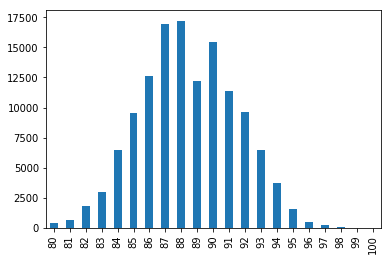

In [29]:
#Let us plot a bar chart using the plot.bar() method to give us a graphical overview of how our points are spread out.
wine_reviews['points'].value_counts().sort_index().plot.bar()

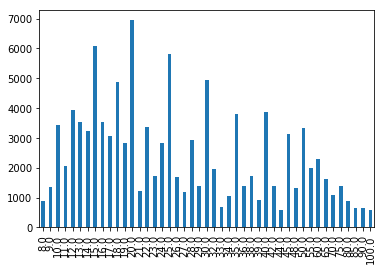

In [42]:
#Let us also plot a bar chart using the plot.bar() method to give us an overview of how our prices look like.
wine_reviews['price'].value_counts()[:100].sort_index().plot.bar()

In [47]:
#Now let's have an overview of the number of countries in our dataset. Might help in further analysis.
total_countries= pd.DataFrame(wine_reviews.country.unique())
total_countries.shape

(44, 1)

In [45]:
#So out of our entire dataset, we can see that wine production centers around 44 countries.
total_countries.head(10)

,0
0,Italy
1,Portugal
2,US
3,Spain
4,France
5,Germany
6,Argentina
7,Chile
8,Australia
9,Austria


In [70]:
#Let us now see the country with the most wine production.
top_countries = pd.DataFrame(wine_reviews['country'].value_counts())
top_countries = top_countries.reset_index()
top_countries = top_countries.rename(columns={'index':'Country', 'country':'Frequency'})

In [72]:
#Let us see the top 10 countries in wine production according to our dataset.
top_countries.head(10)

,Country,Frequency
0,US,54504
1,France,22093
2,Italy,19540
3,Spain,6645
4,Portugal,5691
5,Chile,4472
6,Argentina,3800
7,Austria,3345
8,Australia,2329
9,Germany,2165


In [73]:
#Let us also see the bottom 10 countries in wine production according to our dataset
top_countries.tail(10)

,Country,Frequency
33,Czech Republic,12
34,Cyprus,11
35,India,9
36,Switzerland,7
37,Luxembourg,6
38,Armenia,2
39,Bosnia and Herzegovina,2
40,Slovakia,1
41,Egypt,1
42,China,1


In [75]:
#Now, let us have an overview of the unique varieties of wine we have from our dataset.
uniq_variety = pd.DataFrame(wine_reviews.variety.unique())
uniq_variety

,0
0,White Blend
1,Portuguese Red
2,Pinot Gris
3,Riesling
4,Pinot Noir
...,...
703,Pignolo
704,Caprettone
705,Ondenc
706,Athiri


In [98]:
country_variety = wine_reviews[['variety', 'country']]

In [84]:
country_variety.head(10)

,variety,country
0,White Blend,Italy
1,Portuguese Red,Portugal
2,Pinot Gris,US
3,Riesling,US
4,Pinot Noir,US
5,Tempranillo-Merlot,Spain
6,Frappato,Italy
7,Gewürztraminer,France
8,Gewürztraminer,Germany
9,Pinot Gris,France


In [87]:
uniq_variety = pd.DataFrame(wine_reviews['variety'].value_counts())
uniq_variety = uniq_variety.reset_index()
uniq_variety = uniq_variety.rename(columns={'index': 'variety', 'variety':'Frequency'})

In [103]:
#Let us look at the top 10 varieties of wine we have from our dataset.
uniq_variety.head(10)

,variety,Frequency
0,Pinot Noir,13272
1,Chardonnay,11753
2,Cabernet Sauvignon,9472
3,Red Blend,8946
4,Bordeaux-style Red Blend,6915
5,Riesling,5189
6,Sauvignon Blanc,4967
7,Syrah,4142
8,Rosé,3564
9,Merlot,3102


In [104]:
#Let us look at the bottom 10 varieties of wine from our dataset.
uniq_variety.tail(10)

,variety,Frequency
697,Ojaleshi,1
698,Franconia,1
699,Vidadillo,1
700,Pinot Gris-Gewürztraminer,1
701,Tintilia,1
702,Francisa,1
703,Colorino,1
704,Athiri,1
705,Merseguera-Sauvignon Blanc,1
706,Mavrotragano,1


In [108]:
#Let us have an overview of the number of unique wineries present in our dataset
uniq_winery = pd.DataFrame(wine_reviews.winery.unique())
uniq_winery.shape

(16757, 1)

In [115]:
#Let us see the frequencies of the wineries from our dataset
uniq_winery = pd.DataFrame(wine_reviews['winery'].value_counts())
uniq_winery = uniq_winery.reset_index()
uniq_winery = uniq_winery.rename(columns={'index':'winery','winery':'frequency'})


In [117]:
#Lets see the top 10 wineries according to our dataset.
uniq_winery.head(10)

,winery,frequency
0,Wines & Winemakers,222
1,Testarossa,218
2,DFJ Vinhos,215
3,Williams Selyem,211
4,Louis Latour,199
5,Georges Duboeuf,196
6,Chateau Ste. Michelle,194
7,Concha y Toro,164
8,Columbia Crest,159
9,Kendall-Jackson,130


In [120]:
#Let us also see our bottom 10 wineries from our dataset.
uniq_winery.tail(10)

,winery,frequency
16747,Patrick M. Paul,1
16748,Smallfry,1
16749,Château Viranel,1
16750,Vega Tolosa,1
16751,Cubo,1
16752,Santa Giulia,1
16753,Domaine de Chevilly,1
16754,Domaine Rochette,1
16755,Guanaco,1
16756,Franco Mondo,1


In [156]:
winery_variety = wine_reviews[['winery','variety']]

In [157]:
winery_variety.head(2)

,winery,variety
0,Nicosia,White Blend
1,Quinta dos Avidagos,Portuguese Red


In [158]:
winery_variety[['winery','variety']].groupby('variety').count()

,winery
variety,
Abouriou,3
Agiorgitiko,63
Aglianico,359
Aidani,1
Airen,3
...,...
Zinfandel,2714
Zlahtina,2
Zweigelt,209


In [161]:
win_var = winery_variety.groupby(['winery','variety']).size()

In [162]:
win_var_freq = pd.DataFrame(win_var,columns=['winery'])

In [166]:
win_var_freq.sort_values(by='variety',ascending=False)

,,winery
winery,variety,
Stobi,Žilavka,1
Pasaeli,Çalkarası,2
Weingut Christ,Zweigelt,1
Winzer Krems,Zweigelt,11
Michlits,Zweigelt,1
...,...,...
Nemeion Estate,Agiorgitiko,5
Gaia Wines,Agiorgitiko,4
Cerridwen,Abouriou,1
